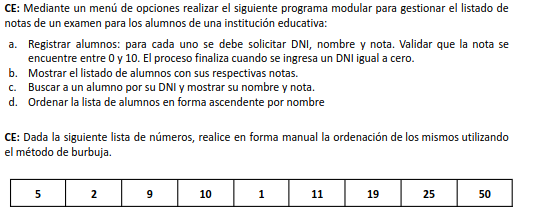


In [5]:
import tkinter as tk
from tkinter import simpledialog, messagebox
import re


def pedir_entrada(prompt):
    # Crear la ventana principal (oculta)
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Mostrar el cuadro de diálogo de entrada
    entrada = simpledialog.askstring(title="Entrada", prompt=prompt)

    # Cerrar la ventana principal
    root.destroy()

    return entrada


def mostrar_error(mensaje):
    # Crear la ventana principal (oculta)
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Mostrar el mensaje de error
    messagebox.showerror("Error", mensaje)

    # Cerrar la ventana principal
    root.destroy()


def mostrar_info(mensaje):
    # Crear la ventana principal (oculta)
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Mostrar el mensaje de información
    messagebox.showinfo("Información", mensaje)

    # Cerrar la ventana principal
    root.destroy()


def validar_entrada(entrada):
    if entrada.isalpha():
        mostrar_info(f"Entrada válida: {entrada}")
    else:
        mostrar_error("La entrada debe contener solo letras.")

######################################################


def validarDni(lista):
    encontrado = False
    while True:
        dni = pedir_entrada("Ingrese el DNI: ")
        if len(dni) == 8 and dni.isdigit():
            for i in lista:
                if i["DNI"] == dni:
                    mostrar_info(
                        "El DNI ingresado ya está en la lista. Ingrese otro")
                    encontrado = True
                    break

            if not encontrado:
                return dni

        else:
            mostrar_error(
                "El DNI debe tener hasta 8 dígitos y solo contener números.")
#############


def validarDniABuscar():
    while True:
        dni = pedir_entrada("Ingrese el DNI: ")

        if len(dni) == 8 and dni.isdigit():
            break
        else:
            mostrar_error(
                "El DNI debe tener hasta 8 dígitos y solo contener números.")
    return dni


def validarNombre():
    while True:
        nombre = pedir_entrada("Ingrese el nombre: ")
        if nombre and re.match(r'^[a-zA-Z\s]+$', nombre):
            break
        else:
            mostrar_error("El nombre solo debe contener letras")
    return nombre


def validarNota():
    while True:
        try:
            nota = int(pedir_entrada("Ingrese la nota: "))
            if 0 <= nota <= 10:
                break
            else:
                mostrar_error("La nota debe estar entre 0 y 10")
        except ValueError:
            mostrar_error("Ingrese un valor correcto")
    return nota


def registrarAlumno(lista, num):
    mostrar_info(f"Alumno {num}")
    dni = validarDni(lista)
    nombre = validarNombre()
    nota = validarNota()

    alumno = {
        "DNI": dni,
        "Nombre y Apellido": nombre,
        "Nota": nota
    }
    lista.append(alumno)


def mostrarLista(lista):
    num = 1
    for alumno in lista:
        mostrar_info(f"""
                     {num} :
                     Nombre: {alumno["Nombre y Apellido"]}
                     Nota: {alumno["Nota"]}
        -------------------------------------------------
        """)
        num = num+1


def buscarAlumnoPorDni(lista):
    dniBuscar = validarDniABuscar()
    datos = ""
    encontrado = False
    for alumno in lista:
        if alumno["DNI"] == dniBuscar:
            datos = datos + f"""Dni: {alumno["DNI"]} \n
     Nombre: {alumno["Nombre y Apellido"]} \n
     Nota: {alumno["Nota"]}
    """
        encontrado = True
        break
    if encontrado:
        mostrar_info(datos)
    else:
        mostrar_info("Dni no encontrado")


def ordenarAlumnos(lista):
    n = len(lista)

    # Implementación de Bubble Sort
    for i in range(n - 1):
        # Iterar hasta el penúltimo elemento
        for j in range(n - i - 1):
            # Comparar el nombre del alumno actual con el siguiente
            if lista[j]["Nombre y Apellido"] > lista[j + 1]["Nombre y Apellido"]:
                # Intercambiar si están en el orden incorrecto
                lista[j], lista[j + 1] = lista[j + 1], lista[j]

    mostrarLista(lista)


def main():
    listaAlumnos = []
    cantAlumnos = 1

    while True:
        try:
            opcion = int(pedir_entrada("""Seleccione una opción: 
                                     1: Registrar alumno
                                     2: Mostrar lista de alumnos
                                     3: Buscar alumno por DNI
                                     4:
                                     5: 
                                     6: Salir 
                                     """
                                       ))
            if opcion:
                if opcion == 1:
                    registrarAlumno(listaAlumnos, cantAlumnos)
                    cantAlumnos = cantAlumnos+1
                elif opcion == 2:
                    if len(listaAlumnos) != 0:
                        mostrarLista(listaAlumnos)
                    else:
                        mostrar_error("La lista está vacía")
                elif opcion == 3:
                    if len(listaAlumnos) != 0:
                        buscarAlumnoPorDni(listaAlumnos)
                    else:
                        mostrar_error("La lista está vacía")
                elif opcion == 4:
                    if len(listaAlumnos) != 0:
                        ordenarAlumnos(listaAlumnos)
                    else:
                        mostrar_error("La lista está vacía")
                elif opcion == 5:
                    mostrar_info("Saliendo.....")
                    break
            else:
                mostrar_info("Opción incorrecta")
        except ValueError:
            mostrar_error("Ingrese un número válido")


main()

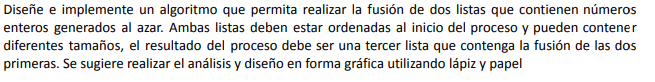


In [3]:
import tkinter as tk
from tkinter import simpledialog, messagebox
import re
import random


def pedir_entrada(prompt):
    # Crear la ventana principal (oculta)
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Mostrar el cuadro de diálogo de entrada
    entrada = simpledialog.askstring(title="Entrada", prompt=prompt)

    # Cerrar la ventana principal
    root.destroy()

    return entrada


def mostrar_error(mensaje):
    # Crear la ventana principal (oculta)
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Mostrar el mensaje de error
    messagebox.showerror("Error", mensaje)

    # Cerrar la ventana principal
    root.destroy()


def mostrar_info(mensaje):
    # Crear la ventana principal (oculta)
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Mostrar el mensaje de información
    messagebox.showinfo("Información", mensaje)

    # Cerrar la ventana principal
    root.destroy()


def validarTamanio(num):
    while True:
        try:
            tamanio = int(pedir_entrada(
                f"Ingrese el tamaño de la lista {num}: "))
            if 0 <= tamanio <= 10:
                break
            else:
                mostrar_error("La nota debe estar entre 0 y 10")
        except ValueError:
            mostrar_error("Ingrese un valor correcto")
    return tamanio


def listaNumAlazar(indice):
    tamanio = validarTamanio(indice)
    lista = []
    for i in range(tamanio):
        num = random.randint(1, 100)
        lista.append(num)

    return lista


def ordenarLista(lista):
    for i in range(len(lista)-1):
        for j in range(0, len(lista)-i-1):
            if lista[j] > lista[j+1]:
                lista[j], lista[j+1] = lista[j+1], lista[j]


def mostrarLista(lista, num):
    datos = " "
    for e in lista:
        datos += f"{e} "

    mostrar_info(f""" Lista {num}  \n
{datos}
                 """)


#####################################
def fusionarListas(lista1, lista2):
    # listaFinal=lista1+lista2
    # listaFinal=lista1.extend((lista2))
    listafinal = [*lista1, *lista2]
    ordenarLista(listafinal)
    return listafinal


def main():
    i = 1
    lista1 = listaNumAlazar(i)
    ordenarLista(lista1)
    mostrarLista(lista1, i)
    i += 1
    lista2 = listaNumAlazar(i)
    ordenarLista(lista2)
    mostrarLista(lista2, i)

    listaFusionada = fusionarListas(lista1, lista2)
    mostrarLista(listaFusionada, "fusionada")


main()

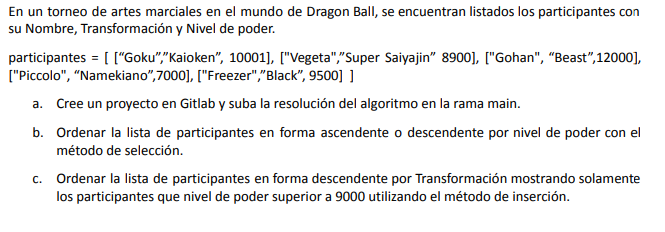


In [8]:
import tkinter as tk
from tkinter import simpledialog, messagebox
import re
import random


def pedir_entrada(prompt):
    # Crear la ventana principal (oculta)
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Mostrar el cuadro de diálogo de entrada
    entrada = simpledialog.askstring(title="Entrada", prompt=prompt)

    # Cerrar la ventana principal
    root.destroy()

    return entrada


def mostrar_error(mensaje):
    # Crear la ventana principal (oculta)
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Mostrar el mensaje de error
    messagebox.showerror("Error", mensaje)

    # Cerrar la ventana principal
    root.destroy()


def mostrar_info(mensaje):
    # Crear la ventana principal (oculta)
    root = tk.Tk()
    root.withdraw()  # Ocultar la ventana principal

    # Mostrar el mensaje de información
    messagebox.showinfo("Información", mensaje)

    # Cerrar la ventana principal
    root.destroy()


def validarNombre():
    while True:
        nombre = pedir_entrada("Ascendente(a) o Descendente(d)? ").lower()
        if nombre and re.match(r'^[a-zA-Z\s]+$', nombre):
            if nombre == "d" or nombre == "a":
                break
            else:
                mostrar_error("Entrada no corecta. Eliga 'a' o 'd' ")
        else:
            mostrar_error("El nombre solo debe contener letras")
    return nombre


def ordenarNivelPoderPorSeleccion(participantes):
    orden = validarNombre()
    n = len(participantes)

    if orden == 'a':
        for i in range(n):
            for j in range(i+1, n):
                if participantes[i][2] > participantes[j][2]:
                    participantes[i], participantes[j] = participantes[j], participantes[i]

    elif orden == 'd':
        for i in range(n):
            for j in range(i+1, n):
                if participantes[i][2] < participantes[j][2]:
                    participantes[i], participantes[j] = participantes[j], participantes[i]


def mostrarLista(lista, mensaje):
    dato = f""" {mensaje}
    -----------------------------------------------"""
    for participante in lista:
        dato += f"""
    Participante:{participante[0]}
    Fase: {participante[1]}
    Poder: {participante[2]}
    ------------------------------"""

    mostrar_info(dato)


def ordenarTransformacionPorIrseccion(participantes):
    participantesFiltro = [p for p in participantes if p[2] > 9000]
    n = len(participantesFiltro)
    for i in range(1, n):
        for j in range(i-1, -1, -1):
            if (participantesFiltro[j][1] < participantesFiltro[j+1][1]):
                participantesFiltro[j], participantesFiltro[j +
                                                            1] = participantesFiltro[j + 1], participantesFiltro[j]
            else:
                break

    participantes[:] = participantesFiltro


def main():
    participantes = [["Goku", "Kaioken", 10001], ["Vegeta", "Super Saiyan", 8900], [
        "Gohan", "Beast", 12000], ["Piccolo", "Namekiano", 7000], ["Freezer", "Black", 9500]]
    mostrarLista(participantes, "LISTA DE PARTICIPANTES SIN ORDENAR")

    mostrar_info("Ordenar según el nivel de poder")
    ordenarNivelPoderPorSeleccion(participantes)
    mostrarLista(participantes, "PARTICIPANTES ORDENADOS POR NIVEL DE PODER")

    mostrar_info("Ordenar según la transformación")
    ordenarTransformacionPorIrseccion(participantes)
    mostrarLista(participantes, "PARTICIPANTES ORDENADOS POR TRANSFORMACIÓN")


main()